# plot timeseries

In [3]:
%matplotlib inline
from config_calc import *
from glob import glob
import matplotlib.pyplot as plt
plt.rcParams['mathtext.default']='regular'

import colorbrewer

varlist = ['O2','TEMP']
tr85 = open_ens('tr85',op,varlist)
tr45 = open_ens('tr85',op,varlist)

    
tr85a[v] = tr85[v].mean(dim='ens')
tr45a[v] = tr45[v].mean(dim='ens')
    
    
grid = diro

1920-1939 avg:
235.577995023
slice(0, 88, None)
slice(87, 182, None)


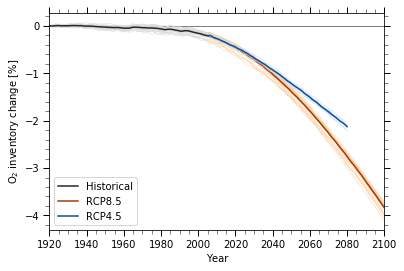

In [10]:

fig = plt.figure() #figsize=(10,8))
ax = fig.add_subplot(111)

ax.minorticks_on()
ax.tick_params(which='major',direction='out',width=1,  length=6, right='on',top='on')
ax.tick_params(which='minor',direction='out',width=0.5,length=4, right='on',top='on')

ax.set_xlim((1920,2100))
ax.set_ylabel('O$_2$ inventory change [%]')
ax.set_xlabel('Year')

v = 'O2'
baseline = tr85a[v].O2[0:20].mean()

print('1920-1939 avg:')
print(baseline.values)

ax.plot((1920,2100),(0,0),'k-',linewidth=0.5)

#-- historical
nx = np.where(tr85a[v].year <= 2006)[0]
nx = slice(nx[0],nx[-1]+1)
print nx
for e in range(len(tr85[v].ens)):
    ax.plot(tr85[v].year[e,nx],100.*(tr85[v].O2[e,nx]-baseline)/baseline,
            linewidth = 0.5,
            color=colorbrewer.singlehue('black')[6])
ph, = ax.plot(tr85a[v].year[nx],100.*(tr85a[v].O2[nx]-baseline)/baseline,
            label = 'Historical',
            color=colorbrewer.singlehue('black')[1])


#-- future
nx = np.where(tr85a[v].year > 2005)[0]
nx = slice(nx[0],nx[-1]+1)
print nx
for e in range(len(tr85[v].ens)):
    ax.plot(tr85[v].year[e,nx],100.*(tr85[v].O2[e,nx]-baseline)/baseline,
            linewidth = 0.5,
            color=colorbrewer.singlehue('orange')[6])
p8, = ax.plot(tr85a[v].year[nx],100.*(tr85a[v].O2[nx]-baseline)/baseline,
        label = 'RCP8.5',
        color=colorbrewer.singlehue('orange')[1])

for e in range(len(tr45[v].ens)):
    ax.plot(tr45[v].year[e,:],100.*(tr45[v].O2[e,:]-baseline)/baseline,
            linewidth = 0.5,
            color=colorbrewer.singlehue('blue')[6])
p4, = ax.plot(tr45a[v].year,100.*(tr45a[v].O2-baseline)/baseline,
        label = 'RCP4.5',        
        color=colorbrewer.singlehue('blue')[1])


plt.legend([ph,p8,p4],['Historical','RCP8.5','RCP4.5'])

plt.savefig(os.path.join(diro['fig'],'global-timeseries-%s.pdf'%v),
            dpi=300,bbox_inches='tight')

slice(0, 88, None)
slice(87, 182, None)


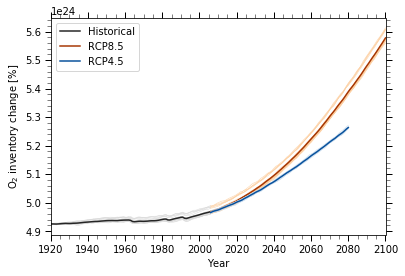

In [14]:
fig = plt.figure() #figsize=(10,8))
ax = fig.add_subplot(111)

ax.minorticks_on()
ax.tick_params(which='major',direction='out',width=1,  length=6, right='on',top='on')
ax.tick_params(which='minor',direction='out',width=0.5,length=4, right='on',top='on')

ax.set_xlim((1920,2100))
ax.set_ylabel('O$_2$ inventory change [%]')
ax.set_xlabel('Year')

v = 'TEMP'

#ax.plot((1920,2100),(0,0),'k-',linewidth=0.5)

#-- historical
nx = np.where(tr85a[v].year <= 2006)[0]
nx = slice(nx[0],nx[-1]+1)
print nx
for e in range(len(tr85[v].ens)):
    ax.plot(tr85[v].year[e,nx],tr85[v].TEMP[e,nx],
            linewidth = 0.5,
            color=colorbrewer.singlehue('black')[6])
ph, = ax.plot(tr85a[v].year[nx],tr85a[v].TEMP[nx],
            label = 'Historical',
            color=colorbrewer.singlehue('black')[1])


#-- future
nx = np.where(tr85a[v].year > 2005)[0]
nx = slice(nx[0],nx[-1]+1)
print nx
for e in range(len(tr85[v].ens)):
    ax.plot(tr85[v].year[e,nx],tr85[v].TEMP[e,nx],
            linewidth = 0.5,
            color=colorbrewer.singlehue('orange')[6])
p8, = ax.plot(tr85a[v].year[nx],tr85a[v].TEMP[nx],
        label = 'RCP8.5',
        color=colorbrewer.singlehue('orange')[1])

for e in range(len(tr45[v].ens)):
    ax.plot(tr45[v].year[e,:],tr45[v].TEMP[e,:],
            linewidth = 0.5,
            color=colorbrewer.singlehue('blue')[6])
p4, = ax.plot(tr45a[v].year,tr45a[v].TEMP,
        label = 'RCP4.5',        
        color=colorbrewer.singlehue('blue')[1])


plt.legend([ph,p8,p4],['Historical','RCP8.5','RCP4.5'])

plt.savefig(os.path.join(diro['fig'],'global-timeseries-%s.pdf'%v),
            dpi=300,bbox_inches='tight')